<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Harvard%20Chest%20XRay/ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#data_path = "drive/My Drive/Simple_Chest_XRay/"
#data_path = "drive/My Drive/NIH_Chest_XRay/"
data_path = "drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 0.4
batch_size = 96
num_epochs = 20

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**


In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

 **DOWNLOAD RESNET18 MODEL AND TRAIN**


In [ ]:
# Define the ResNet18 model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained = False)
model.fc = nn.Linear(512, len(dataset.classes))
model.to(device)

# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "ResNet18", num_epochs)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Epoch 1/20: 100%|██████████| 96/96 [00:36<00:00,  2.62batch/s, Accuracy=0.624, Loss=0.98, Precision=0.611, Recall=0.559, F1 Score=0.568]


VALIDATION: Accuracy: 0.5963 | Loss: 1.0109 | Recall: 0.6311 | Precision: 0.6748 | F-score: 0.6032



Epoch 2/20: 100%|██████████| 96/96 [00:39<00:00,  2.46batch/s, Accuracy=0.488, Loss=1.41, Precision=0.543, Recall=0.478, F1 Score=0.48]


VALIDATION: Accuracy: 0.5902 | Loss: 1.0524 | Recall: 0.5121 | Precision: 0.5924 | F-score: 0.5147



Epoch 3/20: 100%|██████████| 96/96 [00:43<00:00,  2.22batch/s, Accuracy=0.636, Loss=0.944, Precision=0.569, Recall=0.507, F1 Score=0.51]


VALIDATION: Accuracy: 0.6613 | Loss: 0.9012 | Recall: 0.6197 | Precision: 0.6961 | F-score: 0.6192



Epoch 4/20: 100%|██████████| 96/96 [00:46<00:00,  2.07batch/s, Accuracy=0.711, Loss=0.768, Precision=0.603, Recall=0.545, F1 Score=0.553]


VALIDATION: Accuracy: 0.6995 | Loss: 0.7493 | Recall: 0.6537 | Precision: 0.7048 | F-score: 0.6616



Epoch 5/20: 100%|██████████| 96/96 [00:48<00:00,  1.98batch/s, Accuracy=0.744, Loss=0.689, Precision=0.631, Recall=0.577, F1 Score=0.587]


VALIDATION: Accuracy: 0.7424 | Loss: 0.7085 | Recall: 0.7107 | Precision: 0.7568 | F-score: 0.7224



Epoch 6/20: 100%|██████████| 96/96 [00:52<00:00,  1.83batch/s, Accuracy=0.761, Loss=0.638, Precision=0.652, Recall=0.602, F1 Score=0.614]


VALIDATION: Accuracy: 0.7393 | Loss: 0.6875 | Recall: 0.7077 | Precision: 0.7812 | F-score: 0.7156



Epoch 7/20: 100%|██████████| 96/96 [00:54<00:00,  1.75batch/s, Accuracy=0.799, Loss=0.55, Precision=0.673, Recall=0.626, F1 Score=0.638]


VALIDATION: Accuracy: 0.7974 | Loss: 0.5772 | Recall: 0.7847 | Precision: 0.7838 | F-score: 0.7834



Epoch 8/20: 100%|██████████| 96/96 [00:57<00:00,  1.68batch/s, Accuracy=0.791, Loss=0.551, Precision=0.687, Recall=0.643, F1 Score=0.656]


VALIDATION: Accuracy: 0.7836 | Loss: 0.6025 | Recall: 0.7717 | Precision: 0.7919 | F-score: 0.7673



Epoch 9/20: 100%|██████████| 96/96 [00:59<00:00,  1.62batch/s, Accuracy=0.826, Loss=0.479, Precision=0.703, Recall=0.661, F1 Score=0.674]


VALIDATION: Accuracy: 0.7714 | Loss: 0.6092 | Recall: 0.7594 | Precision: 0.7699 | F-score: 0.7598



Epoch 10/20: 100%|██████████| 96/96 [01:01<00:00,  1.56batch/s, Accuracy=0.837, Loss=0.444, Precision=0.717, Recall=0.676, F1 Score=0.69]


VALIDATION: Accuracy: 0.7760 | Loss: 0.6104 | Recall: 0.7905 | Precision: 0.7693 | F-score: 0.7696



Epoch 11/20: 100%|██████████| 96/96 [01:04<00:00,  1.49batch/s, Accuracy=0.846, Loss=0.42, Precision=0.729, Recall=0.69, F1 Score=0.703]


VALIDATION: Accuracy: 0.7699 | Loss: 0.6409 | Recall: 0.7346 | Precision: 0.8048 | F-score: 0.7475



Epoch 12/20: 100%|██████████| 96/96 [01:07<00:00,  1.43batch/s, Accuracy=0.858, Loss=0.384, Precision=0.74, Recall=0.703, F1 Score=0.716]


VALIDATION: Accuracy: 0.8448 | Loss: 0.4318 | Recall: 0.8369 | Precision: 0.8417 | F-score: 0.8376



Epoch 13/20: 100%|██████████| 96/96 [01:09<00:00,  1.37batch/s, Accuracy=0.882, Loss=0.323, Precision=0.751, Recall=0.715, F1 Score=0.728]


VALIDATION: Accuracy: 0.8364 | Loss: 0.4611 | Recall: 0.8219 | Precision: 0.8441 | F-score: 0.8295



Epoch 14/20: 100%|██████████| 96/96 [01:13<00:00,  1.31batch/s, Accuracy=0.868, Loss=0.356, Precision=0.76, Recall=0.725, F1 Score=0.738]


VALIDATION: Accuracy: 0.8150 | Loss: 0.5125 | Recall: 0.7783 | Precision: 0.8439 | F-score: 0.7941



Epoch 15/20: 100%|██████████| 96/96 [01:15<00:00,  1.27batch/s, Accuracy=0.887, Loss=0.308, Precision=0.769, Recall=0.735, F1 Score=0.748]


VALIDATION: Accuracy: 0.8471 | Loss: 0.4403 | Recall: 0.8370 | Precision: 0.8442 | F-score: 0.8381



Epoch 16/20: 100%|██████████| 96/96 [01:21<00:00,  1.18batch/s, Accuracy=0.899, Loss=0.277, Precision=0.777, Recall=0.745, F1 Score=0.757]


VALIDATION: Accuracy: 0.8272 | Loss: 0.4945 | Recall: 0.7913 | Precision: 0.8492 | F-score: 0.8019



Epoch 17/20: 100%|██████████| 96/96 [01:22<00:00,  1.16batch/s, Accuracy=0.896, Loss=0.287, Precision=0.784, Recall=0.753, F1 Score=0.765]


VALIDATION: Accuracy: 0.8471 | Loss: 0.4500 | Recall: 0.8193 | Precision: 0.8671 | F-score: 0.8357



Epoch 18/20: 100%|██████████| 96/96 [01:22<00:00,  1.17batch/s, Accuracy=0.904, Loss=0.257, Precision=0.791, Recall=0.761, F1 Score=0.773]


VALIDATION: Accuracy: 0.8540 | Loss: 0.4157 | Recall: 0.8345 | Precision: 0.8543 | F-score: 0.8415



Epoch 19/20: 100%|██████████| 96/96 [01:25<00:00,  1.12batch/s, Accuracy=0.91, Loss=0.24, Precision=0.798, Recall=0.768, F1 Score=0.78]


VALIDATION: Accuracy: 0.8303 | Loss: 0.5167 | Recall: 0.7979 | Precision: 0.8535 | F-score: 0.8055



Epoch 20/20: 100%|██████████| 96/96 [01:27<00:00,  1.09batch/s, Accuracy=0.918, Loss=0.221, Precision=0.804, Recall=0.776, F1 Score=0.787]


VALIDATION: Accuracy: 0.8502 | Loss: 0.4478 | Recall: 0.8311 | Precision: 0.8656 | F-score: 0.8392

[0.9800762155970228, 1.4090417115600522, 0.9441883494236237, 0.7676648710832064, 0.6885301829387471, 0.6383197682729225, 0.5495681966827054, 0.5508222354069366, 0.478694429952269, 0.44356260207452064, 0.41970673501458977, 0.3840375284838059, 0.3227536342578069, 0.35634963946021486, 0.30775101724354614, 0.2767399766398654, 0.2866461125000255, 0.2565329225906686, 0.2398751725275495, 0.22072690932291633] [1.010896027634997, 1.052411157056826, 0.9011537799047767, 0.7492843510907724, 0.7084827051250213, 0.6875071667749947, 0.5771886750098763, 0.6024834065262331, 0.6091878009498666, 0.6104454726254175, 0.6409090002742382, 0.4318255585268003, 0.4611152044130028, 0.5125024597579186, 0.4402610353373606, 0.49452297895326525, 0.45002592867667524, 0.41574839003589176, 0.5167095663897489, 0.44778754678341226]


**SAVE MODEL PARAMETERS**

In [ ]:
#Save the Model
torch.save(model.state_dict(), "{}resnet18.pth".format(data_path)) 

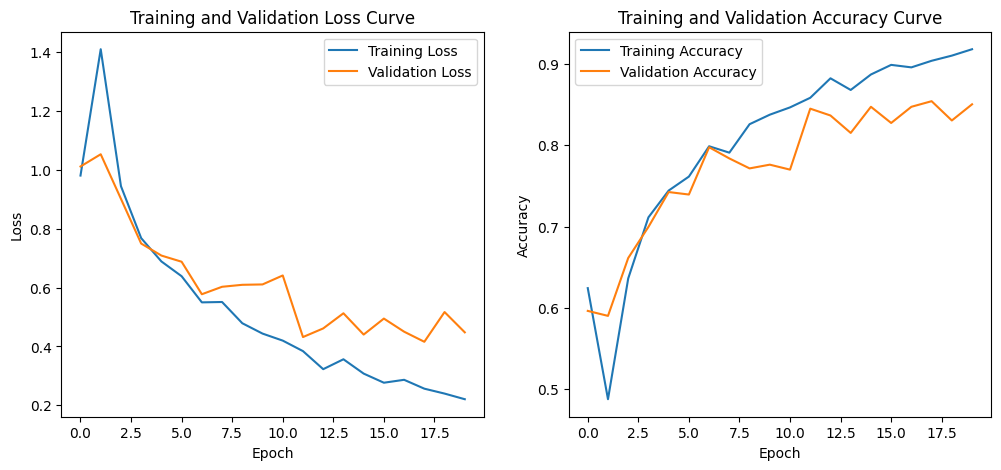

In [ ]:
#Plot the Accuracy and Loss Curves of the model for Training and Validation
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

**EVALUATE MODEL ON VALIDATION AND TEST SET**

TEST: Accuracy: 0.8485 | Loss: 0.4651 | Recall: 0.8173 | Precision: 0.8621 | F-score: 0.8285



<Figure size 800x800 with 0 Axes>

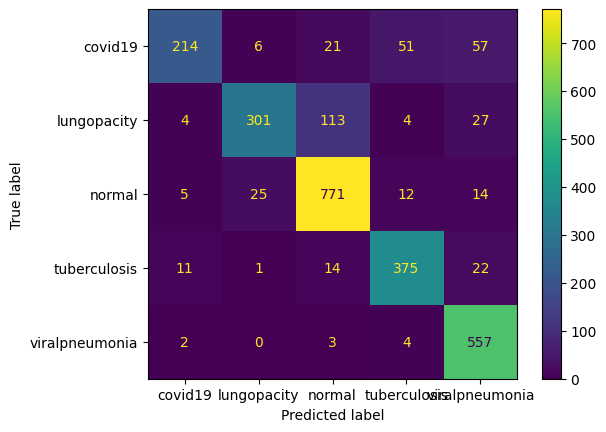

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "ResNet18")

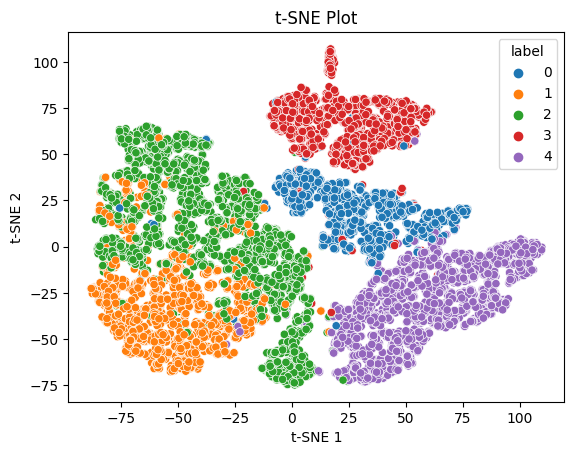

In [ ]:
#Obtain the TSNE Plot
plot_TSNE(train_loader, device, model)

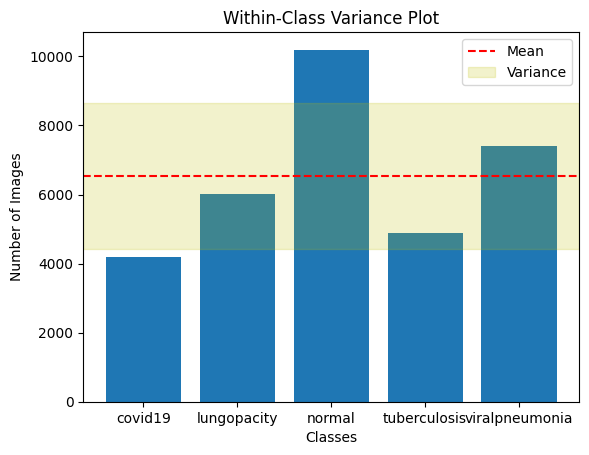

In [ ]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)

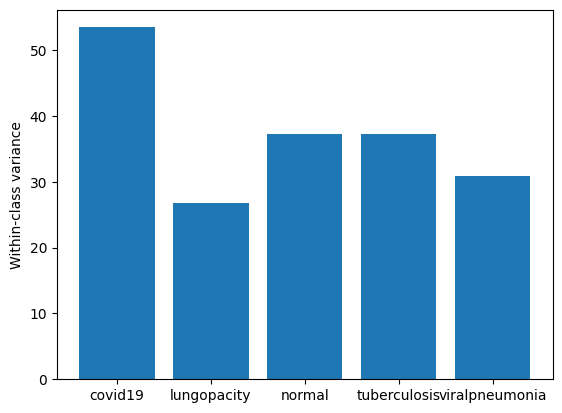

In [ ]:
def within_class_variance(dataset, model):
    # Set the model to evaluation mode
    model.eval()
    # Get the feature vectors and labels for the dataset
    features = []
    labels = []
    for images, targets in train_loader:
        with torch.no_grad():
          images = images.to(device)
          targets = targets.to(device)
          output = model(images)
          features.append(output.cpu().numpy()[0])
          labels.append(targets.cpu().numpy()[0])
    features = np.array(features)
    labels = np.array(labels)
    
    # Calculate the within-class variance for each class
    class_variances = []
    for c in np.unique(labels):
        class_features = features[labels == c]
        class_mean = np.mean(class_features, axis=0)
        class_variance = np.mean(np.sum((class_features - class_mean)**2, axis=1))
        class_variances.append(class_variance)
    
    return class_variances

# Define the dataset and model
# Calculate the within-class variance
class_variances = within_class_variance(dataset, model)

# Plot the within-class variances for each class
plt.bar(np.arange(len(class_variances)), class_variances)
plt.xticks(np.arange(len(class_variances)), dataset.classes)
plt.ylabel('Within-class variance')
plt.show()